Spin up a calculation and create realistic initial condition

In [1]:
from jax.config import config
config.update("jax_enable_x64", True)

In [2]:
import jax.numpy as jnp
import jax_cfd.base as cfd
import search_config as sc

# flow configuration
Re = 40.
L = 2 * jnp.pi
Nx = 128
Ny = 128


grid = cfd.grids.Grid((Nx, Ny), domain=((0, L), (0, L)))
flow_setup = sc.KolFlowSimulationConfig(Re, grid)

In [3]:
u_gv_example = flow_setup.generate_random_ic()

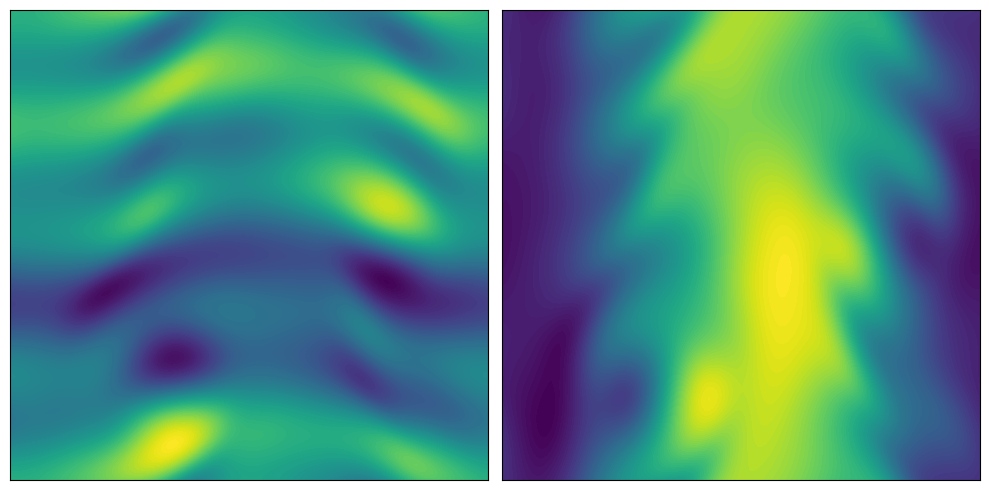

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.contourf(u_gv_example[0].data.T, 101)
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(1, 2, 2)
ax2.contourf(u_gv_example[1].data.T, 101)
ax2.set_xticks([])
ax2.set_yticks([])

fig.tight_layout()

Configure a streamwise shift first

In [5]:
import interact_jaxcfd_dtypes as glue
x_shift = 2 * jnp.pi / 2.
u_gv_shifted = glue.x_shift_field(u_gv_example, x_shift)

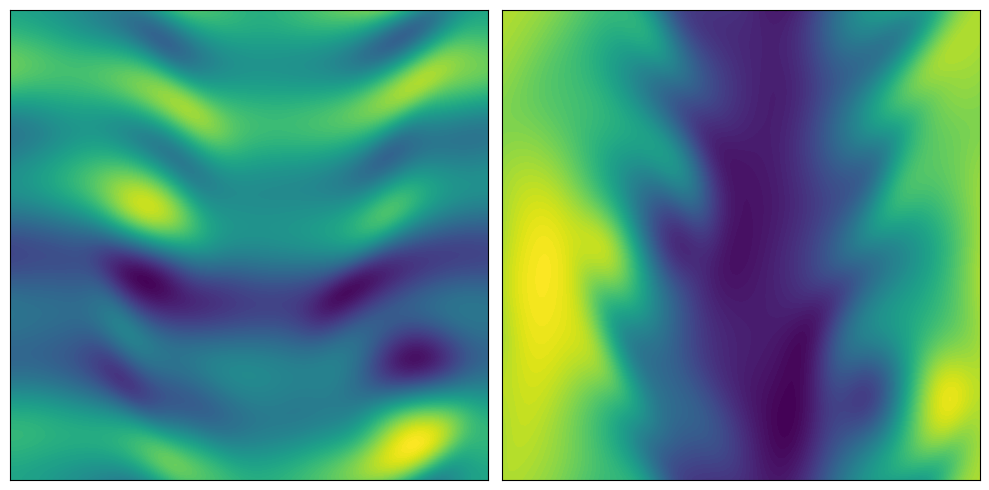

In [6]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.contourf(u_gv_shifted[0].data.T, 101)
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(1, 2, 2)
ax2.contourf(u_gv_shifted[1].data.T, 101)
ax2.set_xticks([])
ax2.set_yticks([])

fig.tight_layout()

Now check shift-reflects

In [9]:
n_shift_reflects = 1
u_gv_shift_reflected = glue.shift_reflect_field(u_gv_shifted, n_shift_reflects)

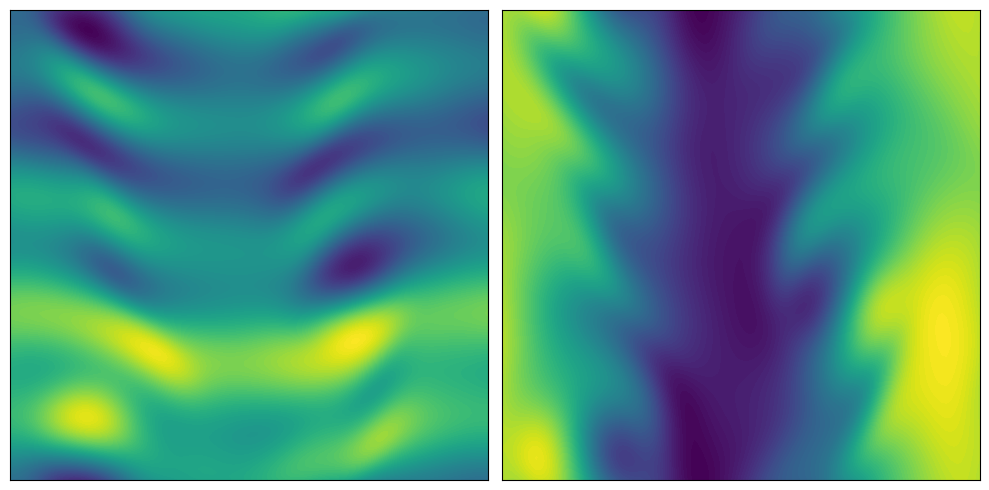

In [10]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.contourf(u_gv_shift_reflected[0].data.T, 101)
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(1, 2, 2)
ax2.contourf(u_gv_shift_reflected[1].data.T, 101)
ax2.set_xticks([])
ax2.set_yticks([])

fig.tight_layout()

Testing some additional functionality 

In [11]:
from functools import partial
import jax

shift_reflect_fn = partial(glue.shift_reflect_field, n_shift_reflects=n_shift_reflects, n_waves=4)
shift_reflect_fn = jax.jit(shift_reflect_fn)